In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [61]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_grad_pres.csv')

In [62]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [63]:
df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [64]:
df_completo.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,ETNIA,SEXO,TIPOCURSO,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-43,3646367","-21,7531292","VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,BRANCA,M,GRADUAÇÃO PRESENCIAL,"-43,4042512","-21,8043129","PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-43,3585569","-21,7500694","SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-44,2857937","-21,718564","ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,NaN,F,GRADUAÇÃO PRESENCIAL,"-42,9806087","-20,850899","PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN


In [65]:
# Filtrar o DataFrame para obter apenas as entradas do sexo feminino ('F')
mulheres = df_completo[df_completo['SEXO'] == 'F']

# Obter o número de mulheres que ingressaram na universidade
numero_de_mulheres_total = mulheres.shape[0]
numero_de_mulheres_total

34633

In [66]:
# Filtrar o DataFrame para obter apenas as entradas do sexo feminino ('F')
homens = df_completo[df_completo['SEXO'] == 'M']

# Obter o número de mulheres que ingressaram na universidade
numero_de_homens_total = homens.shape[0]
numero_de_homens_total

29907

In [76]:
# Filtrar o DataFrame para obter apenas as entradas do sexo feminino ('F')
mulheres_evasao = df_evadidos[df_evadidos['SEXO'] == 'F']

In [77]:
homens_evasao = df_evadidos[df_evadidos['SEXO'] == 'M']

In [78]:
# Obter o número de mulheres que ingressaram na universidade
numero_de_mulheres_evasao = mulheres_evasao.shape[0]
numero_de_mulheres_evasao

10687

In [69]:
numero_de_homens_evasao = homens_evasao.shape[0]
numero_de_homens_evasao

12280

In [71]:
proporcao_evasao_mulheres = (numero_de_mulheres_total / numero_de_mulheres_evasao) * 100
proporcao_evasao_mulheres

324.06662299990643

In [5]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [6]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Número de alunos evadidos')
evadidos_por_ano

,ANO_INGRESSO,Número de alunos evadidos
0,2008,772
1,2009,956
2,2010,1077
3,2011,1573
4,2012,1490
5,2013,1728
6,2014,2356
7,2015,2323
8,2016,2063
9,2017,2031


In [7]:
# Código para excluir as linhas que não quero que entre análise
indices_para_remover = [13, 14, 15]

evadidos_por_ano = evadidos_por_ano.drop(indices_para_remover)

Coeficiente 'a': 67.64285714285715
Coeficiente 'b': -134620.40659340663


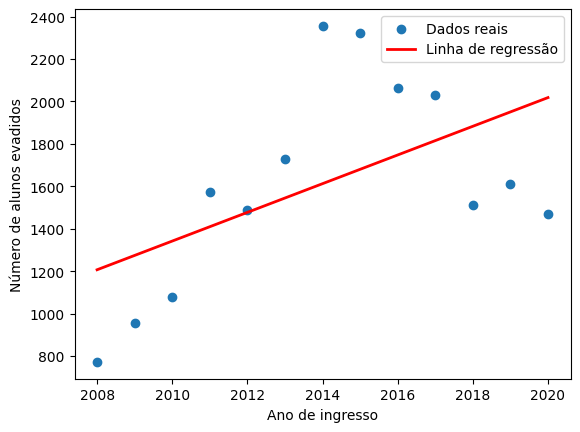

In [8]:
# Separar as variáveis independentes (x) e dependentes (y)
x = evadidos_por_ano['ANO_INGRESSO'].values.reshape(-1, 1)
y = evadidos_por_ano['Número de alunos evadidos'].values

# Inicializar o modelo de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(x, y)

# Obter e imprimir os coeficientes 'a' e 'b'
a = regressor.coef_[0]
b = regressor.intercept_
print(f"Coeficiente 'a': {a}")
print(f"Coeficiente 'b': {b}")

# Fazer previsões com o modelo ajustado
y_pred = regressor.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.xlabel('Ano de ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

Período até 2012 - Coeficiente 'a': 205.30000000000007, Coeficiente 'b': -411479.40000000014
Período após 2012 - Coeficiente 'a': -95.23809523809526, Coeficiente 'b': 193934.11904761908


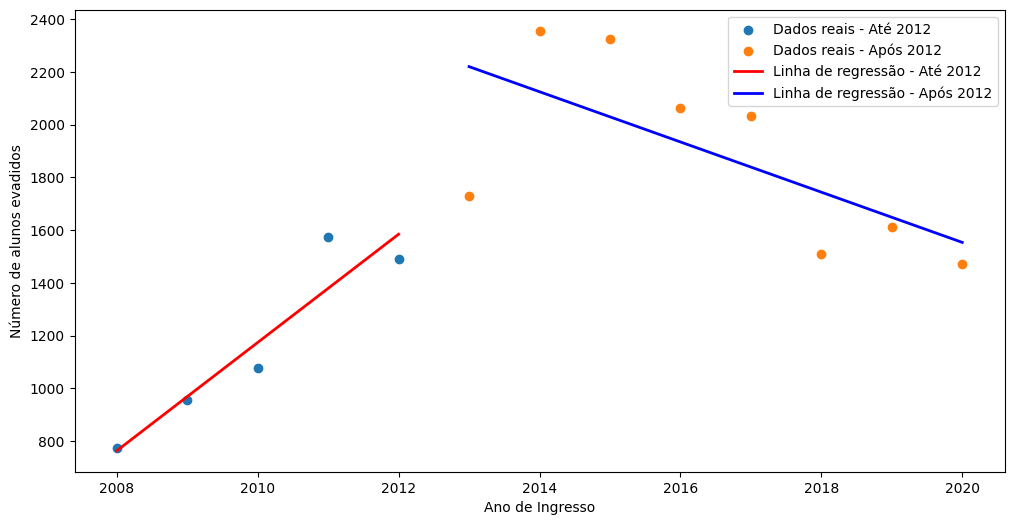

In [9]:
# Dividir os dados em dois períodos: até 2012 e após 2012
periodo_ate_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] <= 2012]
periodo_apos_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] > 2012]

# Separar as variáveis independentes (x) e dependentes (y) para cada período
x_ate_2012 = periodo_ate_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_ate_2012 = periodo_ate_2012['Número de alunos evadidos'].values

x_apos_2012 = periodo_apos_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_apos_2012 = periodo_apos_2012['Número de alunos evadidos'].values

# Inicializar e ajustar o modelo de regressão linear para os dois períodos
regressor_ate_2012 = LinearRegression()
regressor_ate_2012.fit(x_ate_2012, y_ate_2012)

regressor_apos_2012 = LinearRegression()
regressor_apos_2012.fit(x_apos_2012, y_apos_2012)

# Obter os coeficientes 'a' e 'b' para cada período
a_ate_2012 = regressor_ate_2012.coef_[0]
b_ate_2012 = regressor_ate_2012.intercept_

a_apos_2012 = regressor_apos_2012.coef_[0]
b_apos_2012 = regressor_apos_2012.intercept_

print(f"Período até 2012 - Coeficiente 'a': {a_ate_2012}, Coeficiente 'b': {b_ate_2012}")
print(f"Período após 2012 - Coeficiente 'a': {a_apos_2012}, Coeficiente 'b': {b_apos_2012}")

# Fazer previsões com os modelos ajustados para cada período
y_pred_ate_2012 = regressor_ate_2012.predict(x_ate_2012)
y_pred_apos_2012 = regressor_apos_2012.predict(x_apos_2012)

# Plotar os dados e as linhas de regressão para cada período
plt.figure(figsize=(12, 6))
plt.scatter(x_ate_2012, y_ate_2012, label='Dados reais - Até 2012')
plt.scatter(x_apos_2012, y_apos_2012, label='Dados reais - Após 2012')
plt.plot(x_ate_2012, y_pred_ate_2012, color='red', linewidth=2, label='Linha de regressão - Até 2012')
plt.plot(x_apos_2012, y_pred_apos_2012, color='blue', linewidth=2, label='Linha de regressão - Após 2012')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

In [10]:
#Análise R².  
score = regressor_ate_2012.score(x_ate_2012, y_ate_2012)
print(score)

0.8825102618714246


In [11]:
#Análise R².  
score = regressor_apos_2012.score(x_apos_2012, y_apos_2012)
print(score)

0.4334116616558604


In [12]:
import statsmodels.api as sm

In [16]:
# Crie e ajuste o modelo de regressão para o período até 2012
modelo_ate_2012 = sm.OLS(y_ate_2012, sm.add_constant(x_ate_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_ate_2012 = modelo_ate_2012.summary()

# Imprima o resumo no console
print("Resumo para o período até 2012:")
print(resumo_ate_2012)

# Crie e ajuste o modelo de regressão para o período após 2012
modelo_apos_2012 = sm.OLS(y_apos_2012, sm.add_constant(x_apos_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_apos_2012 = modelo_apos_2012.summary()

# Imprima o resumo no console
print("Resumo para o período após 2012:")
print(resumo_apos_2012)

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Resumo para o período até 2012:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     22.53
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0177
Time:                        14:03:19   Log-Likelihood:                -30.409
No. Observations:                   5   AIC:                             64.82
Df Residuals:                       3   BIC:                             64.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.115e+0

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
evadidos_por_cota = df_evadidos.groupby('COTA').size().reset_index(name='Alunos evadidos por cota')
evadidos_por_cota

,COTA,Alunos evadidos por cota
0,Grupo A,2548
1,Grupo A1,22
2,Grupo B,3124
3,Grupo B - antigo,2
4,Grupo B1,22
5,Grupo C,11295
6,Grupo C - antigo,5
7,Grupo D,2243
8,Grupo D1,34
9,Grupo E,1676


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
evadidos_por_curso = df_evadidos.groupby('CURSO_NOME').size().reset_index(name='Alunos evadidos por curso')
evadidos_por_curso

,CURSO_NOME,Alunos evadidos por curso
0,ABI - CIÊNCIAS BIOLÓGICAS,125
1,ABI - CIÊNCIAS SOCIAIS,158
2,ABI - EDUCAÇÃO FÍSICA,127
3,ABI - FILOSOFIA,179
4,ABI - GEOGRAFIA,277
...,...,...
71,QUÍMICA - LICENCIATURA,14
72,RÁDIO TV E INTERNET,53
73,SERVIÇO SOCIAL,338
74,SISTEMAS DE INFORMAÇÃO,280


In [ ]:
# Crie um swarmplot
plt.figure(figsize=(12, 6))  # Defina o tamanho da figura
sns.swarmplot(x='CURSO_NOME', y='Evasao', data=df_evadidos)

# Rotacione os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)

# Adicione rótulos aos eixos
plt.xlabel('Curso')
plt.ylabel('Evasao')

# Exiba o gráfico
plt.show()